100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


<Figure size 432x288 with 0 Axes>

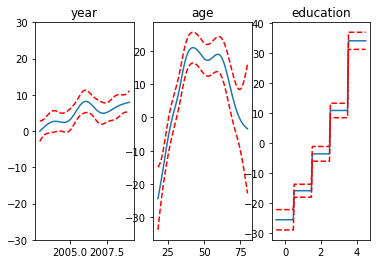

In [5]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage
import numpy as np
from matplotlib import pyplot as plt
X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);  


In [6]:
import pandas as pd
df = pd.read_excel('data.xlsx')
df

,avg_ws80m1,sd_ws80m1,med_ws80m1,riq_sp80m1,avg_ws80m2,sd_ws80m2,med_ws80m2,riq_sp80m2,avg_ws30ft,sd_ws30ft,med_ws30ft,riq_sp30ft,avg_wd,med_wd,avg_wg,med_wg,avg_30ft,avg_hum,wind_speed,pow
0,12.290486,2.468048,12.100651,2.366884,12.461335,2.297320,12.557437,3.139359,7.938776,1.463560,8.0,2.00,18.020408,20.0,9.530612,9.0,34.742857,89.040816,5.805,79.5
1,12.108443,1.689733,12.100651,2.458604,12.426631,1.509785,12.557437,0.000000,7.916667,0.961843,8.0,0.00,31.816667,9.0,9.383333,9.0,34.521667,88.983333,5.883,93.8
2,15.628086,2.017991,15.467534,2.366884,15.984571,1.769569,15.696797,1.569680,10.183333,1.127344,10.0,1.00,226.716667,354.5,11.950000,12.0,34.055000,89.816667,6.391,99.5
3,15.211906,1.876468,15.284092,2.366884,16.010733,1.890697,15.696797,3.139359,10.200000,1.204511,10.0,2.00,24.300000,6.5,12.100000,12.0,33.710000,90.266667,6.608,113.8
4,12.258443,1.815307,12.100651,2.000000,12.662083,1.824757,12.557437,3.139359,8.066667,1.162503,8.0,2.00,8.116667,8.0,9.733333,10.0,33.778333,90.116667,6.533,126.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,5.060390,3.611628,4.733767,4.733767,4.081167,3.600360,3.139359,3.139359,2.600000,2.293691,2.0,2.00,142.833333,20.5,3.283333,3.0,62.720000,95.283333,5.901,17.7
4661,12.170564,2.224924,12.100651,2.458604,13.525407,2.277281,13.342277,1.962100,8.616667,1.450794,8.5,1.25,323.750000,346.0,10.483333,10.0,62.651667,95.483333,6.717,15.6
4662,16.555196,4.612591,16.100651,7.366884,18.548382,5.189903,18.836156,8.240818,11.816667,3.306346,12.0,5.25,317.733333,312.5,14.900000,15.0,61.900000,95.000000,6.912,97.7
4663,17.014071,4.695941,17.467534,7.458604,19.411705,5.071680,19.620996,9.418078,12.366667,3.231029,12.5,6.00,323.900000,320.0,15.866667,16.5,60.943333,95.000000,7.242,103.7


In [7]:

X = df.iloc[:, 0:19].values
y = df.iloc[:, 19].values.reshape(-1,1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)


In [20]:
gam = LinearGAM(lam = 0.2).fit(X_train,y_train)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    193.4173
Link Function:                     IdentityLink Log Likelihood:                                -27039.8889
Number of Samples:                         3265 AIC:                                            54468.6125
                                                AICc:                                           54493.3667
                                                GCV:                                             1762.6848
                                                Scale:                                           1575.7795
                                                Pseudo R-Squared:                                   0.7015
Feature Function                  Lam

<ipython-input-20-b62aeff9ff2b>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [15]:
import numpy as np

lam = np.logspace(-3,5,num=2)
lam


array([1.e-03, 1.e+05])

In [17]:
lams = [lam] * 19

In [18]:
lams
gam.gridsearch(X,y, lam=lams)
gam.summary()

  0% (36 of 524288) |            | Elapsed Time: 0:00:36 ETA:  6 days, 12:29:03

KeyboardInterrupt: 

19

In [21]:
gam.gridsearch(X_train, y_train)


100% (11 of 11) |########################| Elapsed Time: 0:00:12 Time:  0:00:12


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + intercept,
   tol=0.0001, verbose=False)

In [22]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     49.3824
Link Function:                     IdentityLink Log Likelihood:                                -27103.1026
Number of Samples:                         3265 AIC:                                            54306.9699
                                                AICc:                                            54308.581
                                                GCV:                                             1651.4721
                                                Scale:                                           1606.5728
                                                Pseudo R-Squared:                                   0.6814
Feature Function                  Lam

<ipython-input-22-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [29]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score


mean_squared_error(y_test, gam.predict(X_test)), r2_score(y_test, gam.predict(X_test)), mean_absolute_error(y_test, gam.predict(X_test))



(1679.0917611999314, 0.6594790809413111, 31.35208728760206)